In [ ]:
#!pip install missingno

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df_gs = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/강서구.csv', encoding='euc-kr')
df_sp = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/송파구.csv', encoding='euc-kr')

In [ ]:
df_gs.drop(['Unnamed: 0'], axis=1, inplace=True)
df_sp.drop(['Unnamed: 0'], axis=1, inplace=True)

# Elbow method(군집 개수 지정)

## 강서구

In [ ]:
df_gs = df_gs.set_index(['공원이름'])

In [ ]:
df_gs_scaled = StandardScaler().fit_transform(df_gs)
pca = PCA()
pca = pca.fit(df_gs_scaled)
print(pca.explained_variance_ratio_)

[0.44786926 0.181172   0.14030483 0.10659153 0.08106195 0.04300043]


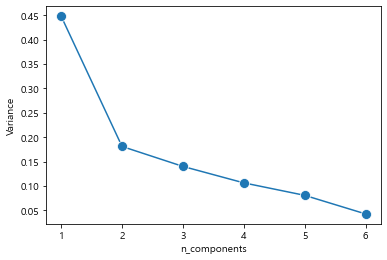

In [ ]:
df_gs_DF = pd.DataFrame({'Variance' : pca.explained_variance_ratio_, 'n_components' : range(1,7)})
sns.lineplot('n_components', 'Variance', data = df_gs_DF, marker = 'o', markersize = 10)
plt.show()

- k=4으로 지정

## 송파구

In [ ]:
df_sp = df_sp.set_index(['공원이름'])

In [ ]:
df_sp_scaled = StandardScaler().fit_transform(df_sp)
pca = PCA()
pca = pca.fit(df_sp_scaled)
print(pca.explained_variance_ratio_)

[0.3017131  0.24522394 0.16745718 0.13739005 0.08630812 0.06190762]


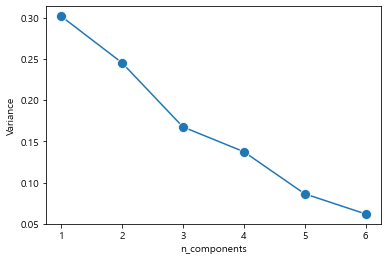

In [ ]:
df_sp_DF = pd.DataFrame({'Variance' : pca.explained_variance_ratio_, 'n_components' : range(1,7)})
sns.lineplot('n_components', 'Variance', data = df_sp_DF, marker = 'o', markersize = 10)
plt.show()

- k=3으로 지정

# PCA 및 클러스터링

## 강서구

In [ ]:
x = df_gs.values # 독립변인들의 value값만 추출
y = df_gs.index # 종속변인 추출
x = StandardScaler().fit_transform(x)
features=['지하철역수','버스정류장수','유동인구비율','복지시설','의료기관','도서관']
pd.DataFrame(x, columns=features).head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관
0,0.770208,-0.853773,-1.082314,0.498382,-0.285837,-0.020207
1,0.770208,-0.251312,-0.391971,-0.626997,-0.241959,1.394295
2,-0.770208,1.556069,-0.391971,0.498382,0.986640,1.394295
3,0.770208,2.158530,-0.391971,1.623761,1.513183,1.394295
4,-0.770208,1.435577,-0.391971,-0.626997,0.767247,-0.020207


In [ ]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
principalDf.head()

,principal component1,principal component2
0,-0.277329,-1.100598
1,0.191816,-0.277109
2,0.978442,1.968942
3,2.433569,1.665605
4,-0.170004,1.517023


In [ ]:
pca.explained_variance_ratio_

array([0.44786926, 0.181172  ])

In [ ]:
sum(pca.explained_variance_ratio_)

0.6290412621866672

### k-means

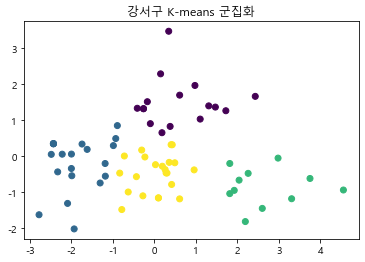

In [ ]:
model = KMeans(n_clusters=4, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(principalDf)


# 클러스터링(군집) 결과
pred_gs_1 = model.predict(principalDf)

# 군집결과 시각화
plt.scatter(x=principalDf["principal component1"], y=principalDf["principal component2"], c=pred_gs_1)
plt.title('강서구 K-means 군집화')
plt.show()

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(principalDf))
predict.columns=['predict']

# concatenate labels to df as a new column
data = pd.concat([principalDf,predict],axis=1)
pred_gs_2 = data['predict']
print(data)

    principal component1  principal component2  predict
0              -0.277329             -1.100598       -1
1               0.191816             -0.277109        0
2               0.978442              1.968942       -1
3               2.433569              1.665605       -1
4              -0.170004              1.517023        1
..                   ...                   ...      ...
65             -1.745563              0.339411        2
66             -0.893602              0.852699       -1
67             -2.782810             -1.626509       -1
68             -2.094585             -1.311300       -1
69              0.026480             -0.233999        0

[70 rows x 3 columns]


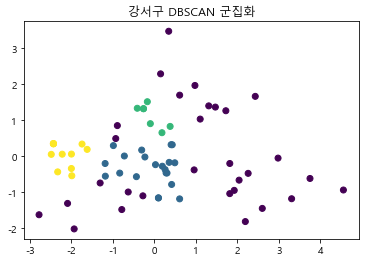

In [ ]:
plt.scatter(x=principalDf["principal component1"], y=principalDf["principal component2"], c=pred_gs_2)
plt.title('강서구 DBSCAN 군집화')
plt.show()

## GMM

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels_gs = gmm.fit_predict(x)

In [ ]:
principalDf['gmm_cluster'] = gmm_labels_gs

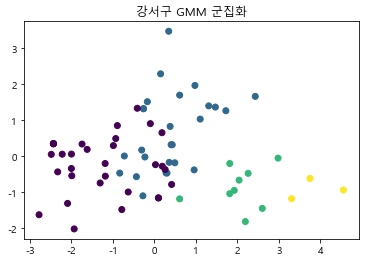

In [ ]:
plt.scatter(principalDf["principal component1"],principalDf["principal component2"],c=gmm_labels_gs)
plt.title('강서구 GMM 군집화')
plt.show()

## 송파구

In [ ]:
x = df_sp.values # 독립변인들의 value값만 추출
y = df_sp.index # 종속변인 추출
x = StandardScaler().fit_transform(x)
features=['지하철역수','버스정류장수','유동인구비율','복지시설','의료기관','도서관']
pd.DataFrame(x, columns=features).head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관
0,-1.060562,-2.758125,0.615705,-1.585104,-1.606630,-0.486792
1,-1.060562,-0.286466,2.117739,-0.125802,0.003238,1.630754
2,1.189898,-0.492438,0.615705,-0.855453,0.727679,-0.486792
3,0.064668,0.125477,0.370278,-0.855453,0.405705,-0.486792
4,-1.060562,-0.286466,-0.587022,-0.490627,-0.680956,1.630754


In [ ]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
principalDf.head()

,principal component1,principal component2
0,-2.391813,-2.552929
1,-0.052156,0.544948
2,-1.571349,0.933907
3,-0.821200,0.278735
4,0.703046,-0.973057


In [ ]:
pca.explained_variance_ratio_

array([0.3017131 , 0.24522394])

In [ ]:
sum(pca.explained_variance_ratio_)

0.5469370389748098

### k-means

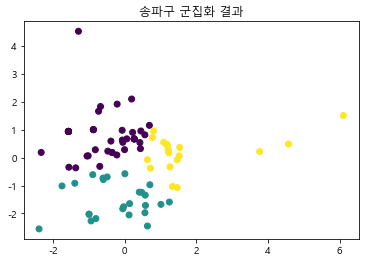

In [ ]:
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(principalDf)


# 클러스터링(군집) 결과
pred_sp_1 = model.predict(principalDf)

# 군집결과 시각화
plt.scatter(x=principalDf["principal component1"], y=principalDf["principal component2"], c=pred_sp_1)
plt.title('송파구 군집화 결과')
plt.show()

### DBSCAN

In [ ]:
# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(principalDf))
predict.columns=['predict']

# concatenate labels to df as a new column
data = pd.concat([principalDf,predict],axis=1)
pred_sp_2 = data['predict']
print(data)

    principal component1  principal component2  predict
0              -2.391813             -2.552929       -1
1              -0.052156              0.544948        0
2              -1.571349              0.933907        1
3              -0.821200              0.278735        0
4               0.703046             -0.973057        2
..                   ...                   ...      ...
82             -0.874391              0.997657       -1
83             -0.353589              0.182406        0
84             -0.874391              0.997657       -1
85             -0.353589              0.182406        0
86              1.537303              0.360626        0

[87 rows x 3 columns]


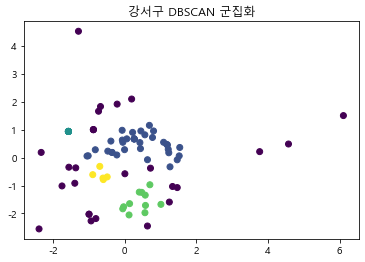

In [ ]:
plt.scatter(x=principalDf["principal component1"], y=principalDf["principal component2"], c=pred_sp_2)
plt.title('강서구 DBSCAN 군집화')
plt.show()

### GMM

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels_sp = gmm.fit_predict(x)

In [ ]:
principalDf['gmm_cluster'] = gmm_labels_sp

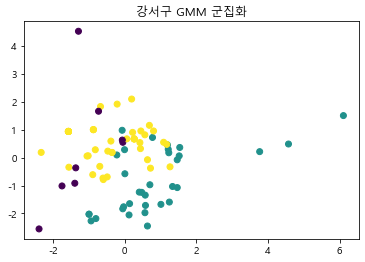

In [ ]:
plt.scatter(principalDf["principal component1"],principalDf["principal component2"],c=gmm_labels_sp)
plt.title('강서구 GMM 군집화')
plt.show()

## 군집 분류

- 엑셀 상에서 입지지수 포함시켜 임의로 파일 생성

In [ ]:
gs_point = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/강서구_지수포함.csv', encoding='euc-kr')
sp_point = pd.read_csv('C:/Users/lkkcl/ewha/공공빅데이터_인턴/4. 실무형 프로젝트/서울2 6조/data/입지선정/송파구_지수포함.csv', encoding='euc-kr')

### 강서구

In [ ]:
pred_gs_1

array([3, 3, 0, 0, 0, 0, 3, 0, 2, 2, 3, 0, 0, 3, 2, 3, 2, 2, 3, 3, 2, 0,
       3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3])

In [ ]:
gs_point['군집'] = pred_gs_1
gs_point

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
0,16,1.0,0.333333,1.000000,1.00,0.752941,1.0,다 운,0.832706,3
1,24,1.0,0.479167,1.000000,0.75,0.800000,0.5,배다리,0.778813,3
2,26,1.0,0.354167,1.000000,0.75,0.623529,0.5,모 태,0.738335,0
3,20,1.0,0.312500,1.000000,0.25,0.788235,0.5,까치,0.590489,0
4,3,0.5,0.729167,0.425843,0.50,0.717647,1.0,새나라,0.570674,0
...,...,...,...,...,...,...,...,...,...,...
65,44,0.0,0.416667,0.000000,0.00,0.000000,0.0,꿈 빛,0.093750,1
66,46,0.0,0.250000,0.157663,0.00,0.011765,0.0,다 솔,0.080723,1
67,39,0.0,0.354167,0.000000,0.00,0.000000,0.0,광 명,0.079687,1
68,68,0.0,0.062500,0.425843,0.00,0.023529,0.0,등촌동,0.079586,1


In [ ]:
gs_lv0 = gs_point[gs_point['군집']==0]
gs_lv1 = gs_point[gs_point['군집']==1]
gs_lv2 = gs_point[gs_point['군집']==2]
gs_lv3 = gs_point[gs_point['군집']==3]

In [ ]:
print()

In [ ]:
gs_lv0_1 = gs_lv0.sort_values(by='입지지수', ascending=False).iloc[0,]
gs_lv1_1 = gs_lv1.sort_values(by='입지지수', ascending=False).iloc[0,]
gs_lv2_1 = gs_lv2.sort_values(by='입지지수', ascending=False).iloc[0,]
gs_lv3_1 = gs_lv3.sort_values(by='입지지수', ascending=False).iloc[0,]

In [ ]:
gs_lv3_1

Unnamed: 0          16
지하철역수                1
버스정류장수        0.333333
유동인구비율               1
복지시설                 1
의료기관          0.752941
도서관                  1
공원이름               다 운
입지지수          0.832706
군집                   3
Name: 0, dtype: object

In [ ]:
print(gs_lv0_1['입지지수'])
print(gs_lv1_1['입지지수'])
print(gs_lv2_1['입지지수'])
print(gs_lv3_1['입지지수'])

0.7383345588235294
0.2617558610554005
0.521875
0.8327058823529412


In [ ]:
gs_lv0.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
2,26,1.0,0.354167,1.000000,0.75,0.623529,0.5,모 태,0.738335,0
3,20,1.0,0.312500,1.000000,0.25,0.788235,0.5,까치,0.590489,0
4,3,0.5,0.729167,0.425843,0.50,0.717647,1.0,새나라,0.570674,0
5,14,1.0,0.229167,1.000000,0.25,0.611765,0.5,버 들,0.559386,0
7,21,0.0,0.541667,1.000000,0.75,0.211765,0.5,하마터,0.526699,0


In [ ]:
gs_lv1.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
38,56,0.5,0.125000,0.503225,0.00,0.223529,1.0,느 티,0.261756,1
39,64,0.5,0.395833,0.285409,0.00,0.141176,0.0,마곡지구3,0.254256,1
40,35,0.5,0.229167,0.422433,0.00,0.129412,0.5,가양(가칭),0.251486,1
41,4,0.0,0.604167,0.425843,0.00,0.517647,0.5,채송화,0.251049,1
43,53,0.0,0.187500,0.503225,0.25,0.082353,1.0,은하수,0.228436,1


In [ ]:
gs_lv2.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
8,8,0.5,0.375000,1.000000,0.25,1.000000,1.0,볏 골,0.521875,2
9,17,0.5,0.354167,1.000000,0.25,0.905882,0.5,솔뫼,0.495599,2
14,23,0.0,0.479167,1.000000,0.50,0.305882,0.5,백 연,0.444224,2
16,25,0.0,1.000000,1.000000,0.00,0.200000,0.5,안 골,0.404000,2
17,36,0.5,0.291667,0.422433,0.25,0.400000,1.0,엄 지,0.374490,2


In [ ]:
gs_lv3.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
0,16,1.0,0.333333,1.0,1.00,0.752941,1.0,다 운,0.832706,3
1,24,1.0,0.479167,1.0,0.75,0.800000,0.5,배다리,0.778813,3
6,27,1.0,0.479167,1.0,0.00,0.682353,0.5,더부리,0.545577,3
10,29,0.5,0.250000,1.0,0.25,0.776471,0.5,화곡2-2(가칭),0.463103,3
13,11,0.0,0.479167,1.0,0.50,0.141176,1.0,큰 별,0.447695,3


- 군집1, 군집4 선택
- 각 군집 당 입지지수 상위 3개씩 추천

### 송파구

In [ ]:
sp_point['군집'] = pred_sp_1

In [ ]:
sp_lv0 = sp_point[sp_point['군집']==0]
sp_lv1 = sp_point[sp_point['군집']==1]
sp_lv2 = sp_point[sp_point['군집']==2]

In [ ]:
sp_lv0_1 = sp_lv0.sort_values(by='입지지수', ascending=False).iloc[0,]
sp_lv1_1 = sp_lv1.sort_values(by='입지지수', ascending=False).iloc[0,]
sp_lv2_1 = sp_lv2.sort_values(by='입지지수', ascending=False).iloc[0,]

In [ ]:
print(sp_lv0_1['입지지수'])
print(sp_lv1_1['입지지수'])
print(sp_lv2_1['입지지수'])

0.6088297214716996
0.6809363558169044
0.4551707578862654


In [ ]:
sp_lv0.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
1,73,1.000000,0.678571,0.567478,0.411765,0.321429,0.0,봉우리,0.608830,0
2,19,0.000000,0.928571,0.403857,0.823529,0.107143,0.5,연 화,0.539066,0
3,10,1.000000,0.678571,0.567478,0.176471,0.297619,0.0,건너말,0.536575,0
5,14,0.666667,0.642857,0.567478,0.294118,0.160714,0.0,웃 말,0.479250,0
6,61,0.333333,0.678571,0.567478,0.470588,0.214286,0.0,샛 별,0.468977,0


In [ ]:
sp_lv1.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
0,32,0.333333,1.000000,0.303465,1.000000,0.077381,1.0,장 수,0.680936,1
4,34,0.000000,0.750000,0.403857,0.764706,0.130952,0.5,문 정,0.482907,1
8,37,0.333333,0.464286,1.000000,0.117647,1.000000,0.5,새마을,0.449758,1
9,60,0.666667,0.642857,0.567478,0.176471,0.160714,0.0,방 죽,0.443956,1
12,78,0.333333,0.464286,0.521730,0.529412,0.369048,0.0,솔 밭,0.442381,1


In [ ]:
sp_lv2.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름,입지지수,군집
7,74,0.333333,0.750000,0.567478,0.352941,0.291667,0.0,새 말,0.455171,2
11,83,0.666667,0.500000,0.567478,0.294118,0.113095,0.0,투구봉,0.443774,2
15,82,0.666667,0.392857,0.567478,0.294118,0.339286,0.0,무궁화,0.435500,2
19,13,0.333333,0.678571,0.567478,0.294118,0.190476,0.0,가 락,0.414369,2
32,56,0.666667,0.392857,0.588901,0.117647,0.345238,0.0,새 싹,0.386189,2


- 군집1 선택
- 각 군집 당 입지지수 상위 3개씩 추천